Nama: Azka Kasmito Putra

NIM: 2241720216

Kelas: TI-3E

# Praktikum 1
KMeans

## KMeans
KMeans adalah satu metode unsupervised learning pada machine learning. Metode ini menentukan jumlah cluster sesuai dengan jumlah k yang dipilih. Proses KMeans secara manual, dapat dilihat pada tautan berikut,

[Perhitungan Manual KMeans](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2F16C2HxTFicQ5tS7aXc1Uvlu1kyvk20LSA_P-E2p47kLY%2Fedit%3Fusp%3Dsharing)

In [ ]:
#Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Penjelasan kode:**

kode diatas merupakan persiapan awal untuk memulai analisis data, khususnya dalam memuat dan menampilkan data dari dataset Iris

In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]


X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Penjelasan kode:**

Kode di atas melakukan seleksi fitur dari dataset Iris, dengan tujuan memisahkan fitur independen (X) dan fitur target atau label (y).

X (fitur): Data yang akan digunakan sebagai input untuk model.

y (target): Data yang akan diprediksi oleh model.

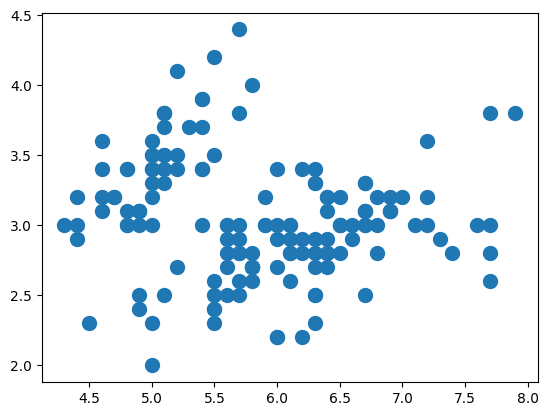

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

**Penjelasan kode:**

Kode di atas berfungsi untuk memvisualisasikan sebagian dari dataset Iris menggunakan plot scatter yang menampilkan hubungan antara dua fitur, yaitu panjang sepal (Sepal Length) dan lebar sepal (Sepal Width).

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

**Penjelasan kode:**

Kode di atas bertujuan untuk membangun dan melatih model clustering K-Means pada data yang telah dipilih sebelumnya (variabel X). Dalam hal ini, model menggunakan 2 kluster, meskipun kita tahu dataset Iris sebenarnya memiliki 3 spesies.

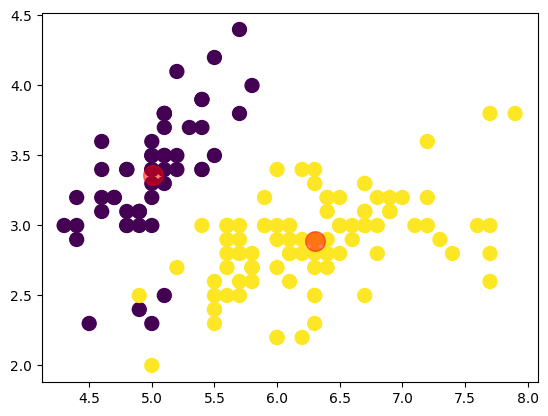

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

**Penjelasan kode:**


Scatter plot menampilkan data Iris berdasarkan Sepal Length dan Sepal Width, diwarnai sesuai kluster yang diprediksi oleh model K-Means.
Pusat kluster (centroids) yang ditemukan oleh model juga ditampilkan, memungkinkan kita untuk melihat di mana titik-titik pusat dari kluster-kluster tersebut berada dalam ruang fitur.

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


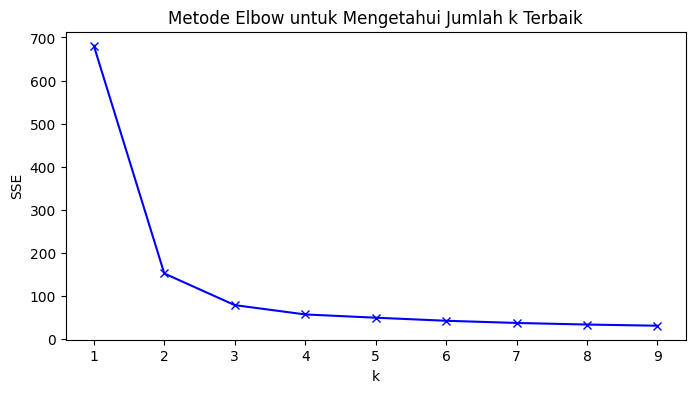

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

**Penjelasan kode:**

Kode di atas digunakan untuk mengimplementasikan Metode Elbow dalam menentukan jumlah kluster (nilai k) terbaik untuk model K-Means. Metode ini bertujuan untuk menemukan jumlah kluster yang optimal dengan meminimalkan SSE (Sum of Squared Errors) atau inertia.

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.317873214285726
k=5; SSE=49.75155308401277
k=6; SSE=42.63338939964701
k=7; SSE=37.55870542264754
k=8; SSE=33.88871835515061
k=9; SSE=31.137817873303188


# Praktikum 2
Konsep K-Means untuk klasterisasi data

### import library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

**Penjelasan kode:**

- matplotlib.pyplot (dengan alias plt) digunakan untuk membuat grafik.
- seaborn (dengan alias sns) digunakan untuk membuat visualisasi statistik yang lebih estetis dan informatif, serta sns.set() mengatur tema tampilan grafik.
- numpy (dengan alias np) digunakan untuk komputasi numerik dan manipulasi data berbasis array.

## Pengantar k-Means

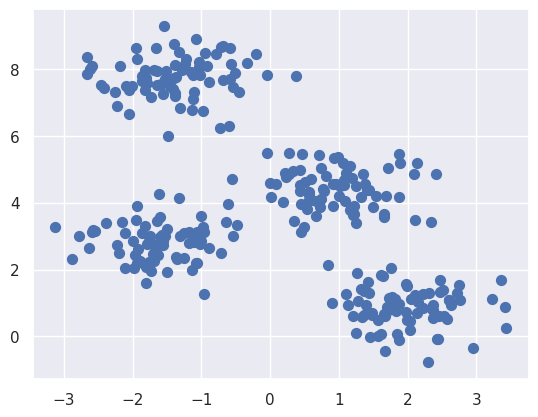

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

**Penjelasan kode:**

- Fungsi make_blobs digunakan untuk menghasilkan dataset sintetis berupa 300 titik data yang dikelompokkan ke dalam 4 kluster, dengan tingkat penyebaran (standar deviasi) tertentu.
- Dataset ini kemudian divisualisasikan menggunakan scatter plot untuk menampilkan distribusi data dalam dua dimensi (X dan Y).

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

**Penjelasan kode:**

- Kode ini membuat model K-Means untuk membagi data ke dalam 4 kluster.
- Model dilatih menggunakan data X untuk menemukan posisi pusat kluster terbaik.
- Setelah dilatih, model memprediksi kluster untuk setiap titik data dalam X, dan hasilnya disimpan dalam y_kmeans.

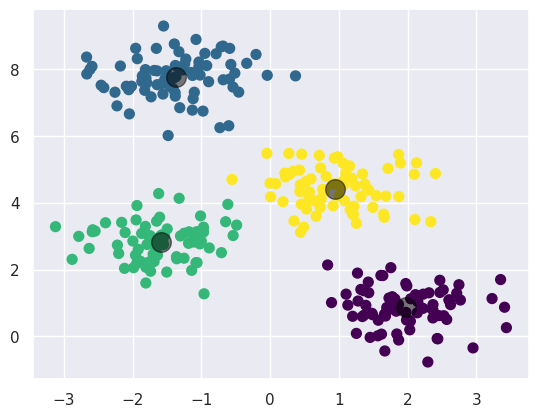

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

**Penjelasan kode:**

- Scatter plot pertama menampilkan titik-titik data yang telah dikelompokkan ke dalam kluster berdasarkan prediksi K-Means, dengan setiap kluster diwarnai secara berbeda.
- Scatter plot kedua menampilkan pusat kluster (centroids) sebagai titik hitam besar, memperlihatkan posisi pusat dari masing-masing kluster.

## Algoritma Expectation-Maximization

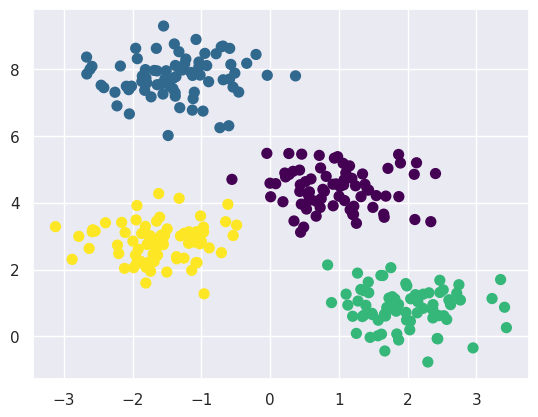

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

**Penjelasan kode:**

1. Pusat cluster dipilih secara acak.
2. Data dikelompokkan berdasarkan jarak terdekat ke pusat cluster.
3. Pusat cluster diperbarui berdasarkan rata-rata dari data dalam setiap cluster.
4. Ulangi sampai pusat cluster tidak berubah.
5. Visualisasi hasil clustering dengan warna berbeda untuk setiap cluster.

### Perubahan random

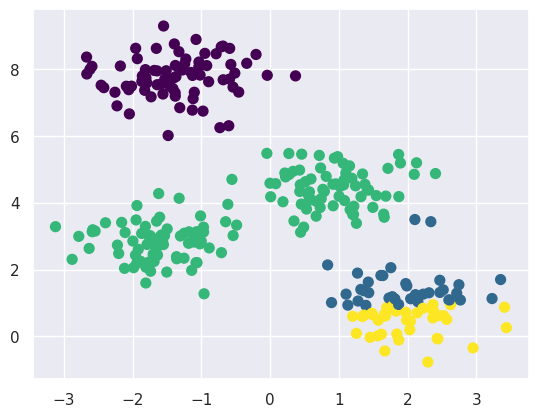

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

**Penjelasan kode:**

1. find_clusters(X, 4, rseed=0): Menentukan 4 pusat cluster dan label tiap data berdasarkan jarak terdekat.
2. plt.scatter: Memvisualisasikan data dengan warna berbeda sesuai cluster (label).

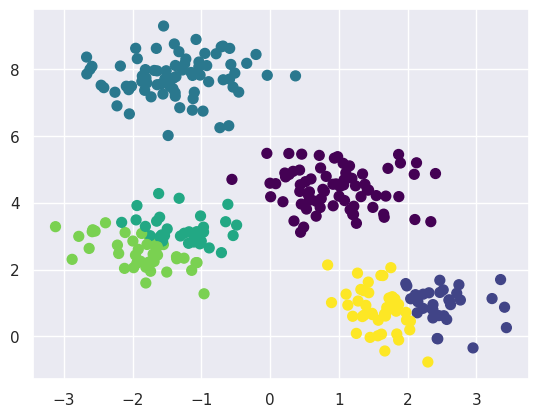

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**Penjelasn kode:**

Kode tersebut membagi data X menjadi 6 cluster menggunakan K-Means, lalu memvisualisasikan hasilnya dengan warna berbeda untuk tiap cluster.

### Batas Klaster yang Tidak Selalu Linier

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

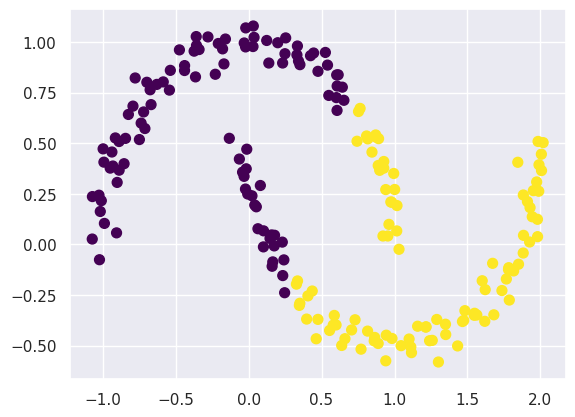

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

**Penjelasan kode:**

Kode tersebut membuat dataset berbentuk moons dengan 200 titik data, lalu membagi data menjadi 2 cluster menggunakan K-Means, dan memvisualisasikan hasilnya dengan warna berbeda untuk masing-masing cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


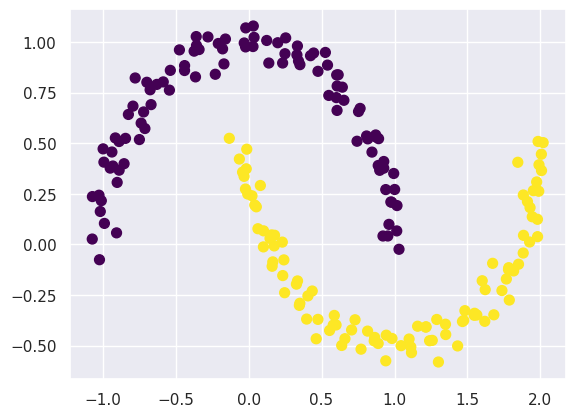

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**Penjelasan kode:**

Kode tersebut membagi data X menjadi 2 cluster menggunakan Spectral Clustering berbasis grafik, lalu memvisualisasikan hasilnya dengan warna berbeda untuk tiap cluster.

## Contoh Kasus 1: Karakter Angka

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

**Penjelasan kode:**

Kode tersebut memuat dataset gambar digit angka (0-9) dari scikit-learn, lalu menampilkan bentuk data fitur, yaitu (1797, 64) yang berarti terdapat 1.797 sampel dengan masing-masing memiliki 64 fitur (piksel).

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

**Penjelasan kode:**

Kode tersebut menerapkan K-Means untuk membagi data digit menjadi 10 cluster, kemudian menampilkan bentuk pusat cluster yang ditemukan, yaitu (10, 64), yang berarti terdapat 10 pusat cluster dengan 64 fitur masing-masing.

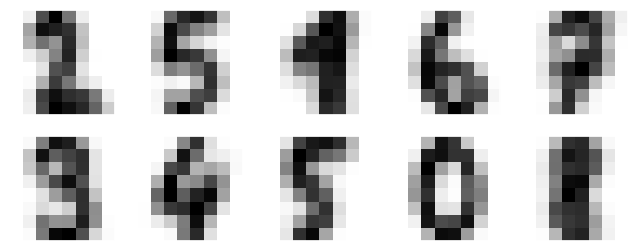

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

**Penjelasan kode:**

Kode tersebut menampilkan pusat cluster K-Means sebagai gambar 8x8 untuk setiap cluster, dengan 10 gambar (1 untuk setiap cluster) disusun dalam grid 2x5. Gambar ini merepresentasikan pola rata-rata dari setiap cluster.

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

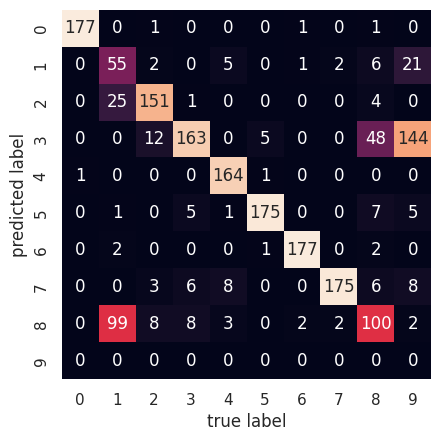

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

**Penjelasan kode:**

Kode tersebut membuat matriks kebingunguan antara label asli (digits.target) dan label hasil prediksi dari K-Means (labels), kemudian menampilkan matriks tersebut dalam bentuk heatmap. Heatmap ini menunjukkan seberapa akurat prediksi cluster terhadap label asli, dengan label yang ditampilkan pada sumbu X dan Y.

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9415692821368948

**Penjelasan kode:**

Kode tersebut menggunakan t-SNE untuk mereduksi dimensi data digit menjadi 2D, lalu menerapkan K-Means untuk mengelompokkan data menjadi 10 cluster. Setelah itu, label cluster dipetakan ulang agar sesuai dengan label asli, dan akurasi klasifikasi dihitung.

## Studi Kasus 2: Kompresi Citra

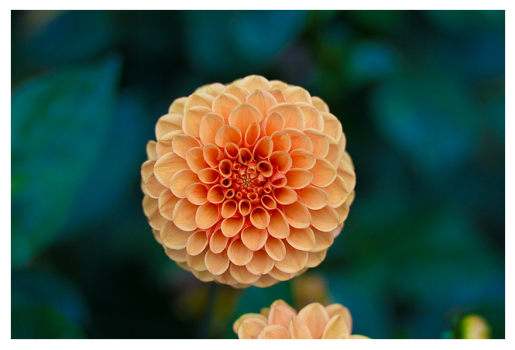

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

**Penjelasan kode:**

Kode tersebut memuat gambar sampel "flower.jpg" dari scikit-learn dan menampilkannya tanpa sumbu X dan Y.

In [ ]:
flower.shape

(427, 640, 3)

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

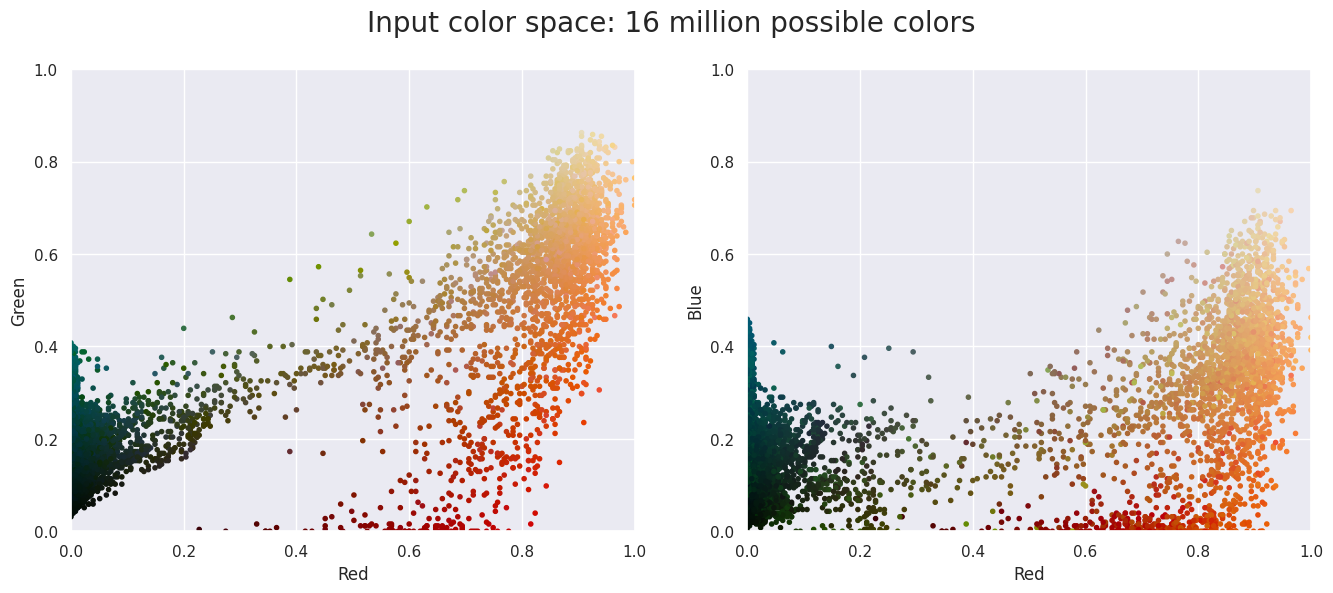

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

**Penjelasan kode:**

Kode tersebut membuat plot untuk visualisasi data warna dalam ruang warna RGB.

* Scatter plot:
 * Grafik kiri: Merah (R) vs Hijau (G).
 * Grafik kanan: Merah (R) vs Biru (B).
* Warna setiap titik diatur sesuai dengan nilai warna aslinya.
* Menampilkan judul "Input color space: 16 million possible colors".

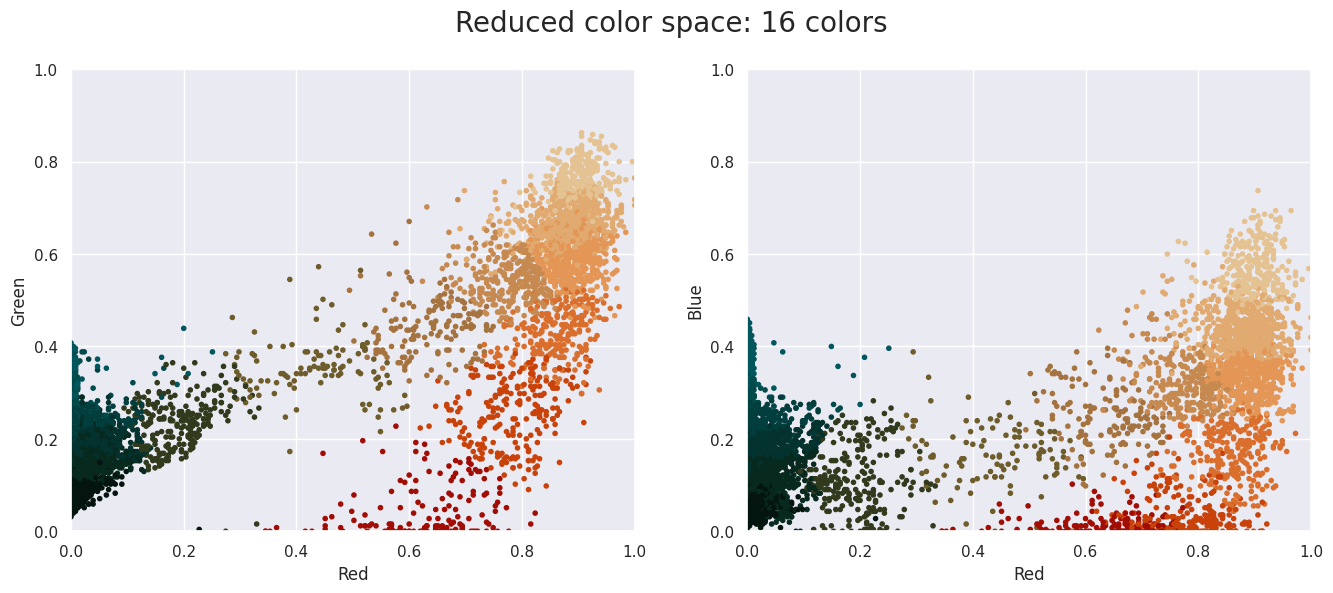

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

**Penjelasan kode:**

Kode tersebut menggunakan MiniBatchKMeans untuk mereduksi ruang warna dalam data menjadi hanya 16 warna, lalu memvisualisasikan data dengan warna baru yang terkuantisasi dalam grafik RGB. Judul grafik: "Reduced color space: 16 colors".

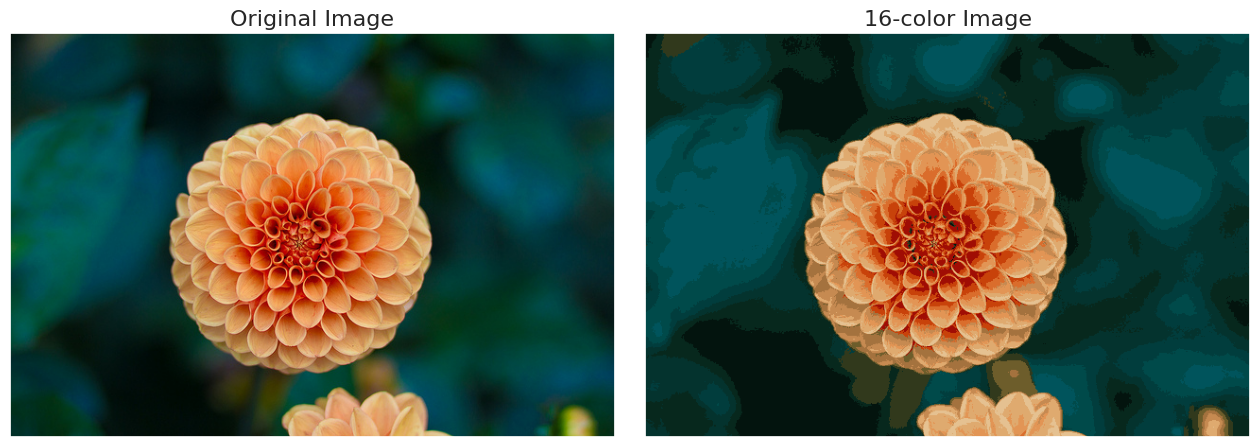

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

**Penjelasan kode:**

Kode tersebut menampilkan perbandingan antara gambar asli dan versi gambar dengan 16 warna yang telah dikuantisasi menggunakan MiniBatchKMeans, disusun berdampingan dalam satu plot.

# Praktikum 3
Self-optimizing Map (SOM)

Contoh penerapan Self-Organizing Map (SOM) untuk klaterisasi menggunakan library SOMPY. Sebelum memulai, pastikan Anda telah menginstal library SOMPY. JIka dalam library tidak ditemukan SOMPY bisa menggunakan minisom. Dalam Praktikum ini akan menggunakan library MiniSom untuk implementasi SOM dengan ukuran yang lebih kecil.

instalasi SOM

In [ ]:
pip install minisom

In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Gunakan dataset Iris sebagai contoh

In [ ]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

Normalisasi dataset agar nilainya berada dalam rentang yang seragam.

In [ ]:
# Normalisasi data
data = data / data.max(axis=0)

Menentukan ukuran peta, misalkan (10x10) dan inisialisasi SOM

In [ ]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

Inisialisasi bobot SOM secara acak.

In [ ]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

Melatih SOM dengan data menggunakan metode train_random.

In [ ]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

Menggunakan peta hasil pelatihan untuk visualisasi. Dalam praktikum ini, akan menampilkan peta dengan warna dan menandai pemenang untuk setiap sampel.

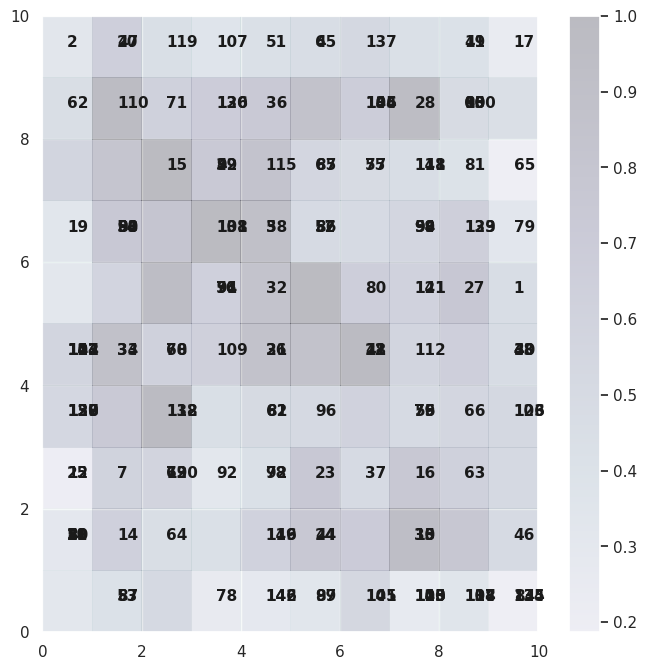

In [ ]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

**Penjelasan kode:**

Kode tersebut memvisualisasikan hasil Self-Organizing Map (SOM):
1. som.winner(x): Menentukan neuron pemenang untuk setiap sampel data.
2. som.distance_map(): Menampilkan peta jarak (distance map) antar neuron.
3. Plot: Menampilkan teks indeks sampel di atas neuron pemenang, dengan peta jarak divisualisasikan sebagai latar belakang bergradasi.

# Praktikum 4
Penerapan metode Self-Organizing Map (SOM) untuk segmentasi citra Lenna.

In [ ]:
pip install minisom

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [ ]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [ ]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [ ]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [ ]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [ ]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
Lenna_path = "/content/Lenna.png"
Lenna = io.imread(Lenna_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

In [ ]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

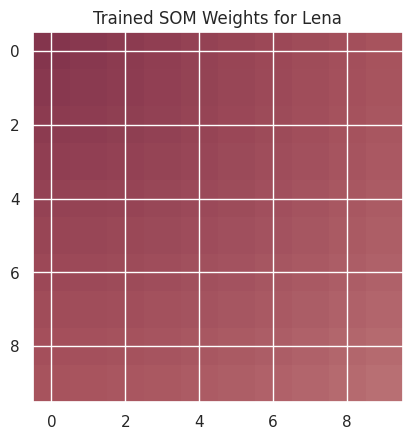

In [ ]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()

**Penjelasan kode:**

Kode tersebut melatih Self-Organizing Map (SOM) untuk memetakan fitur warna dari gambar Lenna:
1. Inisialisasi: Bobot SOM diinisialisasi secara acak.
2. Pelatihan: Bobot diperbarui secara iteratif berdasarkan jarak ke piksel gambar menggunakan radius tetangga dan tingkat pembelajaran yang menurun.
3. Visualisasi: Menampilkan bobot akhir SOM setelah pelatihan sebagai representasi fitur dari gambar Lenna.

# Tugas Praktikum

## Tugas
Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.
4. Buatlah  implementasi model SOM untuk segmentasi citra lain

### 1. Gunakan data 'Mall_Customer.csv'

In [1]:
#import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv('/content/Mall_Customers.csv')

data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [2]:
# cek null
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


### 2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
Menggunakan tiga fitur, yaitu:
- Age: Fitur ini menggambarkan usia pelanggan.
- Annual Income (k$): Fitur ini merupakan pendapatan tahunan pelanggan dalam ribu dolar.
- Spending Score (1-100): Fitur ini adalah skor pengeluaran pelanggan, yang berkisar antara 1 hingga 100 dan mencerminkan sejauh mana pelanggan cenderung menghabiskan uang di toko tersebut.

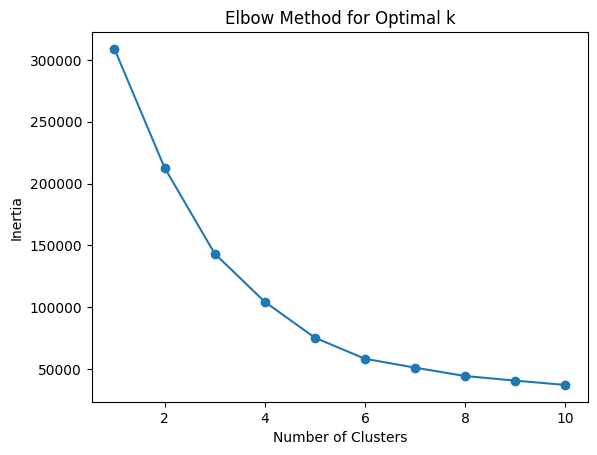

     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39        0
1     21                  15                      81        3
2     20                  16                       6        0
3     23                  16                      77        3
4     31                  17                      40        0
..   ...                 ...                     ...      ...
195   35                 120                      79        1
196   45                 126                      28        4
197   32                 126                      74        1
198   32                 137                      18        4
199   30                 137                      83        1

[200 rows x 4 columns]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Memuat dataset
data = pd.read_csv('/content/Mall_Customers.csv')

# 3 fitur yang akan digunakan untuk clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Menentukan jumlah cluster menggunakan metode Elbow
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot metode Elbow
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Pilih jumlah cluster yang optimal (misalnya, 5)
optimal_n_clusters = 5

# Melakukan clustering dengan jumlah cluster yang optimal
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=0, n_init=10)
data['Cluster'] = kmeans.fit_predict(X)

# Menampilkan hasil clustering
print(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])

### 3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik

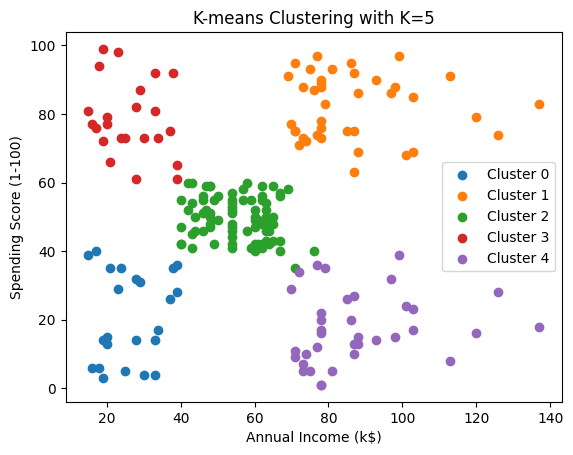

The best K is 5


In [4]:
# Create and fit the final K-means model with the best K
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=0,n_init=10)
kmeans.fit(X)

# Add cluster labels to the data
data['Cluster'] = kmeans.labels_

# Visualization of the clustering
for i in range(best_k):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {i}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title(f'K-means Clustering with K={best_k}')
plt.show()

print(f"The best K is {best_k}")

### 4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [5]:
# Install minisom
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=824eff23cc265e6fcd95819c647c110e9a89a63c1a4d8f964456d8049493ff84
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


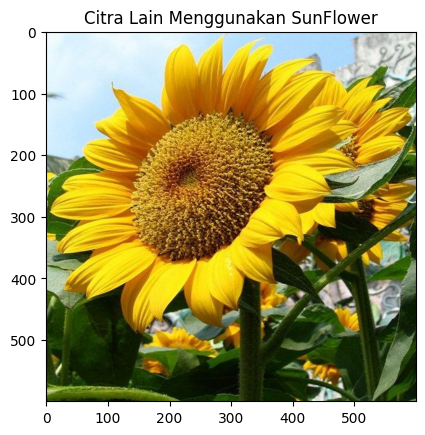

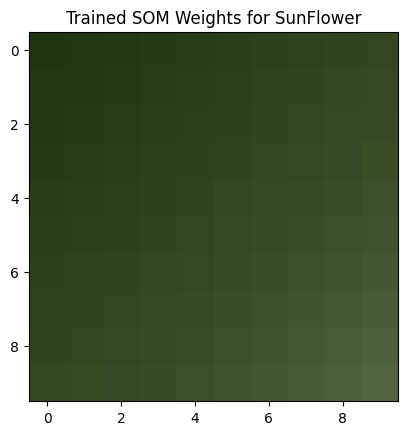

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

# Load citra SunFlower
SunFlower_path = "/content/flower.jpg"
plt.title('Citra Lain Menggunakan SunFlower')
Flower = io.imread(SunFlower_path)
plt.imshow(Flower)
plt.grid(False)
plt.show()
SunFlower = io.imread(SunFlower_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

# Latih SOM
num_epochs = 10
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(SunFlower, num_epochs, initial_learning_rate, initial_neighborhood_radius)

# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for SunFlower')
plt.grid(False)
plt.show()